In [355]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

## We Need Data
We will use sklearn's make_regression function in order to give us a proper data to perform simple linear regression analysis.

In [525]:
data, targets = make_regression(
    n_samples=10,    # samples per feaure
    n_features=5,    # number of features
    n_informative=3, # numer of informative features
    bias = np.sum(np.random.rand(5)),
)

## Correlation
We cheated (for the purpose of learning!). It is certain that we have three "informative" variables as stated in our make_regression. <br>
Let us confirm this by finding the correlation coefficients between each of our features and our target.

In [526]:
print("Correlation of feature vs target\n")
for i in range(data.shape[1]):
    corr_matrix = np.corrcoef(data[:,i], targets)
    print("Feature",i,":",format(corr_matrix[0, 1], '.3f'))

Correlation of feature vs target

Feature 0 : 0.424
Feature 1 : -0.625
Feature 2 : 0.184
Feature 3 : 0.741
Feature 4 : 0.718


## Regression
It has been made apparent that we have some useful features to play with. Lets create a best fit line for our data using least squares. <br>
In order to check the coefficients found below, we will use sklearn's built in linear_model &rarr; LinearRegression function. <br><br>
<em>Note: Doing multiple regression may result in higher predictive power, but lets save that for the next notebook!</em>

In [487]:
def simple_least_squares(x, y):
    
    """
    Custom least squares regression
    """
    
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    b1 = np.sum(np.dot((x - x_mean), (y - y_mean))) / np.sum(np.dot((x - x_mean),(x - x_mean)))
    b0 = y_mean - np.dot(b1, x_mean)
    
    return b0, b1

In [488]:
def simple_sklearn_regression(x, y):
    
    """
    sklearn's regression
    """
    
    model = LinearRegression()
    model.fit(x.reshape(-1, 1), y)
    return (model.intercept_, model.coef_[0])

In [529]:
b0, b1 = simple_least_squares(data[:, 3], targets)
print("Custom Eq:\ty =", format(b0,'.3f'), "+", format(b1,'.3f'), "x")
b0, b1 = simple_sklearn_regression(data[:, 3], targets)
print("Sklearn Eq:\ty =", format(b0,'.3f'), "+", format(b1,'.3f'), "x")

Custom Eq:	y = -37.287 + 53.022 x
Sklearn Eq:	y = -37.287 + 53.022 x


## Basic Regression Analysis
Lets look at some of our most informative features.

In [490]:
def regression_plot(x, y, b0, b1):
    
    """
    Helper function to make clean visualizations from our regression
    """
    
    min_val = np.min(x)
    max_val = np.max(x)
    min_y = b1 * min_val + b0
    max_y = b1 * max_val + b0

    plt.scatter(x, y, label="Data")
    plt.plot([min_val, max_val], [min_y, max_y], c='r', label="Line of Fit")
    plt.title("Least Squares Fit of Our Data")
    plt.xlabel("x values")
    plt.ylabel("y values")
    plt.legend()
    plt.show()

In [491]:
def sum_of_square_total(y):
    
    """
    Total square error squared, where fit line = mean(y)
    """
    
    mean_y = np.mean(y)
    return np.sum([(y[i] - mean_y) ** 2 for i in range(len(y))])

In [492]:
def sum_of_square_error(x, y, b0, b1):
    
    """
    sum of "Residual" error between predicted output and desired output squeared
    """
    
    return np.sum([(y[i] - predict(x[i], b0, b1)) ** 2 for i in range(len(y))])

def predict(x, b0, b1):
    return b0 + b1 * x

In [493]:
def sum_of_square_regression(SST, SSE):
    
    """
    Difference between total error and residual error
    """
    
    return SST - SSE

In [494]:
def r_square(SSR, SST):
    
    """
    How well our best fit line compares to the total square error
    """
    
    return SSR / SST

In [495]:
def regression_analysis(x, y):
    
    """
    Suite for analysis
    """
    
    b0, b1 = simple_least_squares(x, y)
    SST = sum_of_square_total(y)
    SSE = sum_of_square_error(x, y, b0, b1)
    SSR = sum_of_square_regression(SST, SSE)
    rsqr = r_square(SSR, SST)
    
    print("- " * 30)
    print("SST :", custom_format(SST))
    print("SSE :", custom_format(SSE))
    print("SSR :", custom_format(SSR))
    print("R^2 :", custom_format(rsqr))  
    print("- " * 30)
    regression_plot(x, y, b0, b1)

def custom_format(val):
    return format(val, '.3f')

Feature 1
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
SST : 57826.505
SSE : 35239.874
SSR : 22586.631
R^2 : 0.391
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


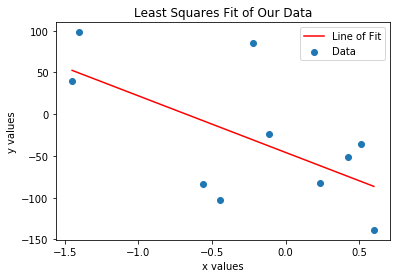

Feature 3
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
SST : 57826.505
SSE : 26070.562
SSR : 31755.943
R^2 : 0.549
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


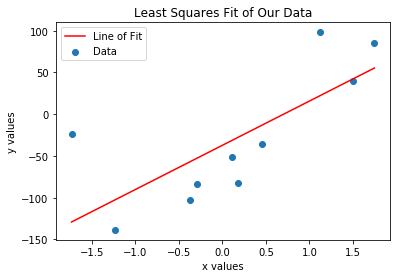

Feature 4
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
SST : 57826.505
SSE : 28015.863
SSR : 29810.643
R^2 : 0.516
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


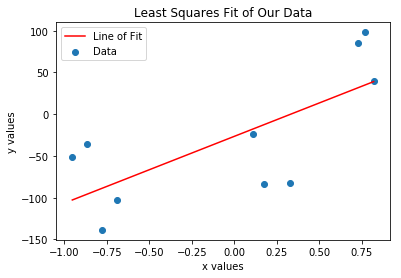

In [528]:
relevant_features = [1, 3, 4]
for i in relevant_features:
    print("Feature", i)
    regression_analysis(data[:, i], targets)